In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.set_random_seed(777)

In [4]:
mnist = input_data.read_data_sets("Mnistdata/", one_hot = True)

Extracting Mnistdata/train-images-idx3-ubyte.gz
Extracting Mnistdata/train-labels-idx1-ubyte.gz
Extracting Mnistdata/t10k-images-idx3-ubyte.gz
Extracting Mnistdata/t10k-labels-idx1-ubyte.gz


In [5]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))

In [6]:
hypothesis = tf.matmul(L2, W3) + b3

In [7]:
pred = tf.nn.softmax(hypothesis)

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X : batch_xs, Y : batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch : ', '%04d' %(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch :  0001 cost =  142.434001517
Epoch :  0002 cost =  38.788843136
Epoch :  0003 cost =  24.337825663
Epoch :  0004 cost =  16.947267557
Epoch :  0005 cost =  12.351179795
Epoch :  0006 cost =  9.140817402
Epoch :  0007 cost =  6.829469742
Epoch :  0008 cost =  5.090859240
Epoch :  0009 cost =  3.751133729
Epoch :  0010 cost =  2.883376826
Epoch :  0011 cost =  2.106427400
Epoch :  0012 cost =  1.601038411
Epoch :  0013 cost =  1.215120164
Epoch :  0014 cost =  0.965219458
Epoch :  0015 cost =  0.759505314
Learning Finished!


In [14]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy: ' , sess.run(accuracy, feed_dict={X : mnist.test.images, Y : mnist.test.labels}))

Accuracy:  0.9464


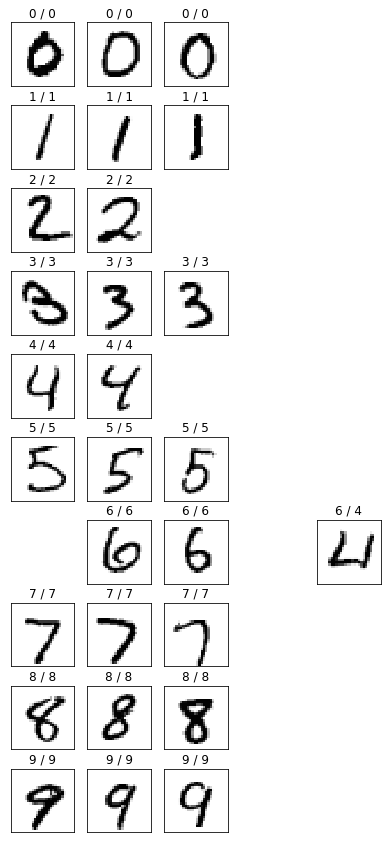

In [16]:
images, labels = mnist.test.images, mnist.test.labels
pred_val = sess.run(pred, feed_dict = {X : images, Y : labels})

fig = plt.figure(figsize = (8, 15))
for i in range(10):
    c = 1
    for (image, label, p) in zip(images, labels, pred_val):
        prediction, actual = np.argmax(p), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10, 6, i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' %(prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation = "nearest")
        c += 1
        if c > 6:
            break